# Grid Study and Sensitivity Analysis

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
#import kelp_param
import kelp3d_objs as k3
import ipyparallel as ipp
import concurrent.futures as cf
import itertools as it
#from sympy import divisors
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy.interpolate import interp1d
import ipyvolume as ipv

import kelp_compute
import kelp_analyze

In [63]:
import sqlite3
import shutil
import os

In [64]:
#remote_config = kelp_param.ParamSpanRemoteConfig()
ipc = ipp.Client()
lv = ipc.load_balanced_view()
dv = ipc.direct_view()
print(ipc.ids)

[0, 1, 2, 3]


def cdkelp():
    import os
    os.chdir('/global/homes/o/oevans/kelp/code/python')
dv.apply(cdkelp)

### Define Constants

In [65]:
# Hard-coded parameters
rope_spacing = 5.0 # (m)
zmin, zmax = 0.0, 10.0 # (m)

# Light from above
I0 = 50.0 # (W/m^2)
phi_s = 0 # (rad)
theta_s = 0 # (rad)
decay = 0 # (?) - light (practically) only from directly above

# Calculated or otherwise boring parameters
xmin = -rope_spacing/2
xmax = rope_spacing/2
ymin = -rope_spacing/2
ymax = rope_spacing/2

# Solver parameters
lis_options = "-i gmres -restart 10000 -tol 1e-4"

# Grid Study 1 (Base case: Top-heavy)

In [ ]:
# Set parameters
study_name = 'gs22all_top_heavy'
a_water = 0.179
b = 0.219
kelp_dist='top-heavy'
ns_max = 22
nz_max = 22
na_max = 22
ns_list = range(6, ns_max+1, 2)
nz_list = range(6, nz_max+1, 2)
na_list = range(6, na_max+1, 2)
lis_opts = '-i gmres -restart 100'
# TODO: Make this default?
base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')

# ns_list = [4,10]
# nz_list = [4,10]
# na_list = [10,12]

# TODO: Don't actually delete results
# shutil.rmtree(os.path.join(base_dir, study_name), ignore_errors=True)

# combine_thread, gs_fut = kelp_compute.grid_study_compute(
#     study_name, 
#     a_water, b, kelp_dist,
#     ns_list, nz_list, na_list,
#     lis_opts, base_dir=base_dir
# )

# Grid Study 2 (bottom-heavy)

In [ ]:
# Set parameters
study_name = 'gs22all_bottom_heavy'
a_water = 0.179
b = 0.219
kelp_dist='bottom-heavy'
ns_max = 22
nz_max = 22
na_max = 22
ns_list = range(6, ns_max+1, 2)
nz_list = range(6, nz_max+1, 2)
na_list = range(6, na_max+1, 2)
lis_opts = '-i gmres -restart 100'
# TODO: Make this default?
base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')

# ns_list = [4,10]
# nz_list = [4,10]
# na_list = [10,12]

# TODO: Don't actually delete results
# shutil.rmtree(os.path.join(base_dir, study_name), ignore_errors=True)

# combine_thread, gs_fut = kelp_compute.grid_study_compute(
#     study_name, 
#     a_water, b, kelp_dist,
#     ns_list, nz_list, na_list,
#     lis_opts, base_dir=base_dir
# )

Appending existing study directory.


# Grid Study 3 (high scattering: NUC 2240)

In [ ]:
# Set parameters
study_name = 'gs22all_high_scatter'
a_water = 0.179
b = 1.205
kelp_dist='top-heavy'
ns_max = 22
nz_max = 22
na_max = 22
ns_list = range(6, ns_max+1, 2)
nz_list = range(6, nz_max+1, 2)
na_list = range(6, na_max+1, 2)
lis_opts = '-i gmres -restart 100'
# TODO: Make this default?
base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')

# ns_list = [4,10]
# nz_list = [4,10]
# na_list = [10,12]

# TODO: Don't actually delete results
# shutil.rmtree(os.path.join(base_dir, study_name), ignore_errors=True)

# combine_thread, gs_fut = kelp_compute.grid_study_compute(
#     study_name, 
#     a_water, b, kelp_dist,
#     ns_list, nz_list, na_list,
#     lis_opts, base_dir=base_dir
# )

## Analyze Grid Study

## Whole cube

In [113]:
def cori_grid_study_plot_full(study_name):
    base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')
    study_dir = os.path.join(base_dir, study_name)
    db_path = os.path.join(study_dir, '{}.db'.format(study_name))
    perceived_irrad_dict, abs_err_arr, rel_err_arr, compute_time_dict = (
        kelp_analyze.grid_study_analyze_full(db_path, study_name)
    )
    
    #return ipv.quickvolshow(abs_err_arr),
    return abs_err_arr, rel_err_arr


In [114]:
abs_err_arr, rel_err_arr = cori_grid_study_plot_full('gs22all_top_heavy')

/global/u2/o/oevans/kelp/code/python/kelp_analyze.py:232: RuntimeWarning: invalid value encountered in true_divide
  perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))


### Reproduce three edges plot

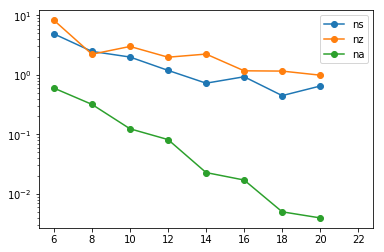

In [123]:
ns_list = nz_list = na_list = np.arange(6, 24, 2)
plt.figure()
plt.semilogy(ns_list, rel_err_arr[:,-1,-1], 'o-', label='ns')
plt.semilogy(nz_list, rel_err_arr[-1,:,-1], 'o-', label='nz')
plt.semilogy(na_list, rel_err_arr[-1,-1,:], 'o-', label='na')
plt.legend()
plt.show()

### Top faces

/global/homes/o/oevans/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


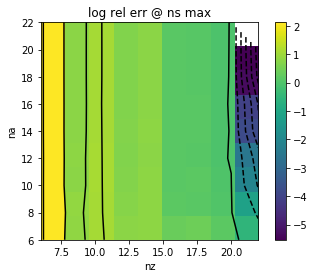

/global/homes/o/oevans/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


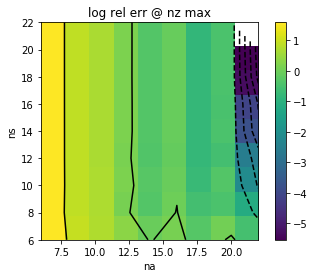

/global/homes/o/oevans/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


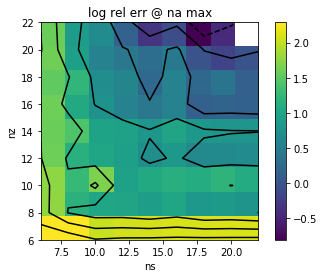

In [163]:
# ns max
ns_list = nz_list = na_list = np.arange(6, 24, 2)
plt.figure()
plt.title('log rel err @ ns max')
rel_err_ns_plane = np.log(rel_err_arr[-1,:,:])
nz_grid, na_grid = np.meshgrid(nz_list, na_list, indexing='ij')
#rel_err_ns_plane = nz_grid - na_grid
extent = (nz_list[0], nz_list[-1], na_list[0], na_list[-1])
plt.contour(nz_grid, na_grid, rel_err_ns_plane, colors='k')
plt.imshow(rel_err_ns_plane.T, extent=extent, origin='lower', interpolation='nearest')
plt.xlabel('nz')
plt.ylabel('na')
plt.colorbar()
plt.show()

# nz max
nz_list = na_list = ns_list = np.arange(6, 24, 2)
plt.figure()
plt.title('log rel err @ nz max')
rel_err_nz_plane = np.log(rel_err_arr[:,-1,:])
na_grid, ns_grid = np.meshgrid(na_list, ns_list, indexing='ij')
#rel_err_nz_plane = na_grid - ns_grid
extent = (na_list[0], na_list[-1], ns_list[0], ns_list[-1])
plt.contour(na_grid, ns_grid, rel_err_nz_plane, colors='k')
plt.imshow(rel_err_nz_plane.T, extent=extent, origin='lower', interpolation='nearest')
plt.xlabel('na')
plt.ylabel('ns')
plt.colorbar()
plt.show()

# na max
na_list = ns_list = nz_list = np.arange(6, 24, 2)
plt.figure()
plt.title('log rel err @ na max')
rel_err_na_plane = np.log(rel_err_arr[:,:,-1])
ns_grid, nz_grid = np.meshgrid(ns_list, nz_list, indexing='ij')
#rel_err_na_plane = ns_grid - nz_grid
extent = (ns_list[0], ns_list[-1], nz_list[0], nz_list[-1])
plt.contour(ns_grid, nz_grid, rel_err_na_plane, colors='k')
plt.imshow(rel_err_na_plane.T, extent=extent, origin='lower', interpolation='nearest')
plt.xlabel('ns')
plt.ylabel('nz')
plt.colorbar()
plt.show()

## Three edges

In [108]:
def cori_grid_study_plot_three_edges(study_name):
    base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')
    study_dir = os.path.join(base_dir, study_name)
    db_path = os.path.join(study_dir, '{}.db'.format(study_name))
    perceived_irrad_dict, abs_err_arr, rel_err_arr, compute_time_dict = (
        kelp_analyze.grid_study_analyze_edges(db_path, study_name)
    )

    kelp_analyze.grid_study_plot(
        perceived_irrad_dict, 
        abs_err_arr, 
        rel_err_arr, 
        compute_time_dict, 
        zmin, zmax
    )

/global/u2/o/oevans/kelp/code/python/kelp_analyze.py:232: RuntimeWarning: invalid value encountered in true_divide
  perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))


ns


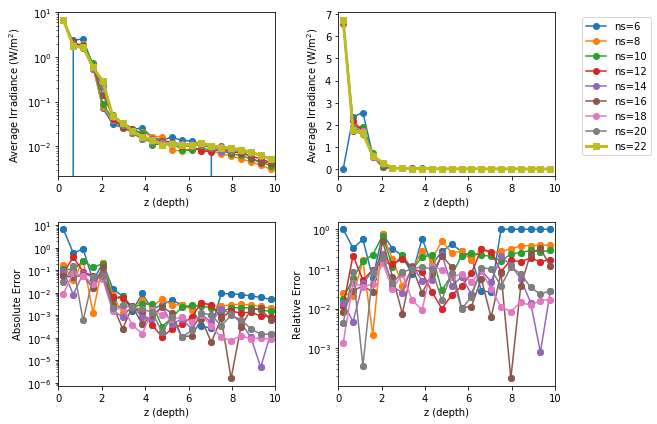

nz


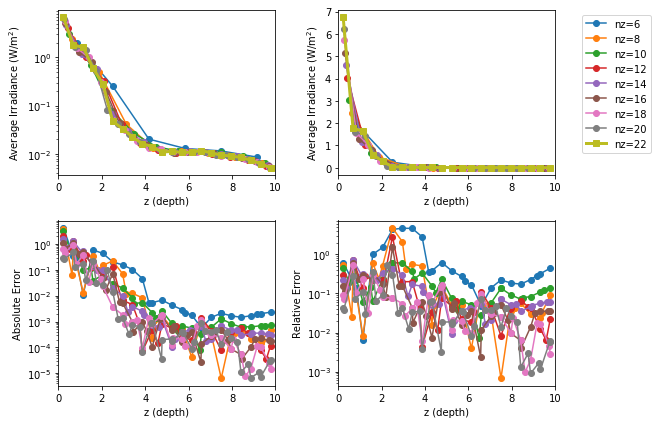

na


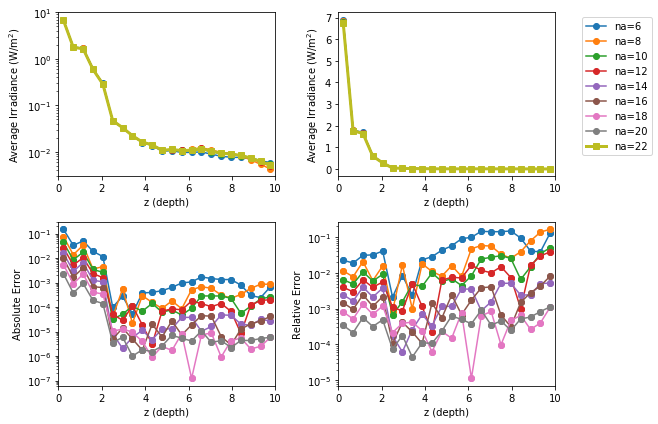

together


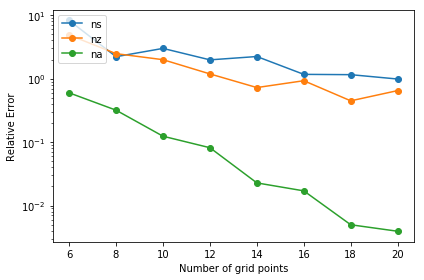

In [103]:
cori_grid_study_plot_three_edges('gs22all_top_heavy')

/global/u2/o/oevans/kelp/code/python/kelp_analyze.py:232: RuntimeWarning: invalid value encountered in true_divide
  perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))


ns


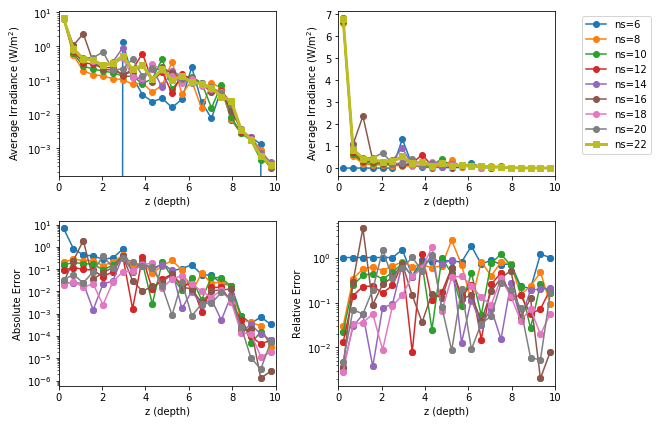

nz


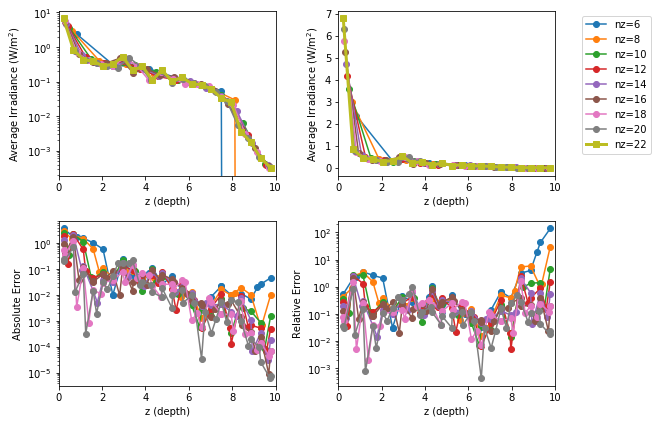

na


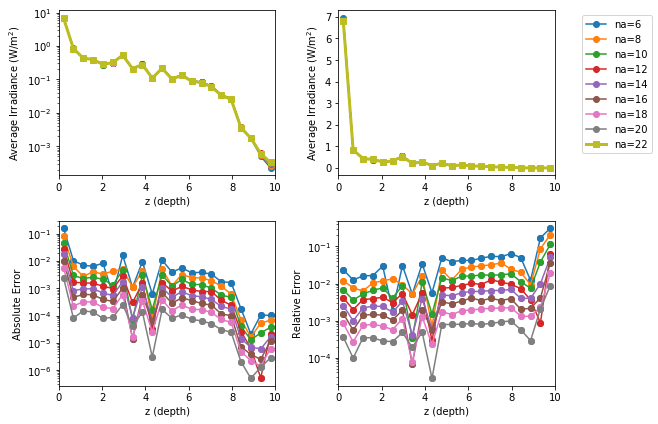

together


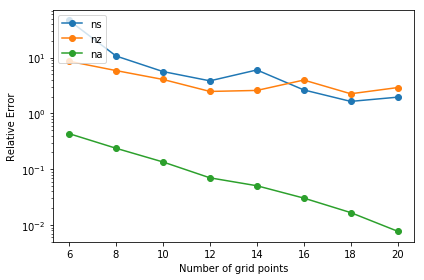

In [99]:
cori_grid_study_plot_three_edges('gs22all_bottom_heavy')

/global/u2/o/oevans/kelp/code/python/kelp_analyze.py:232: RuntimeWarning: invalid value encountered in true_divide
  perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))


ns


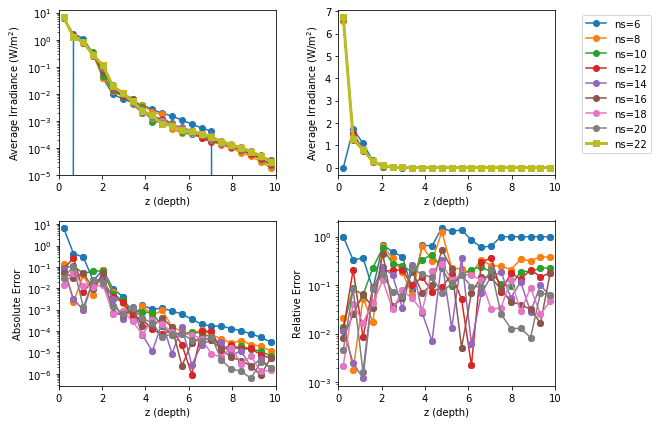

nz


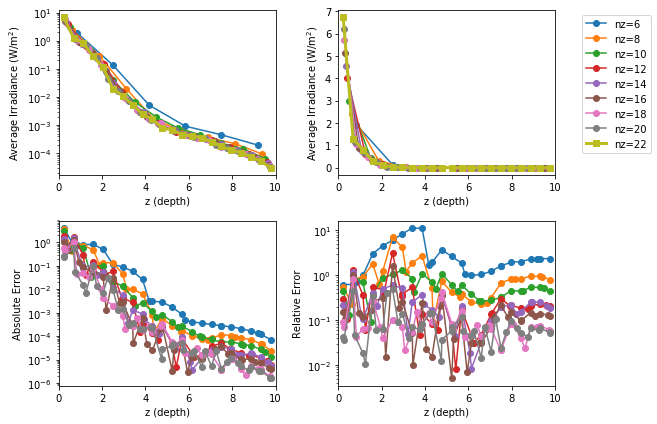

na


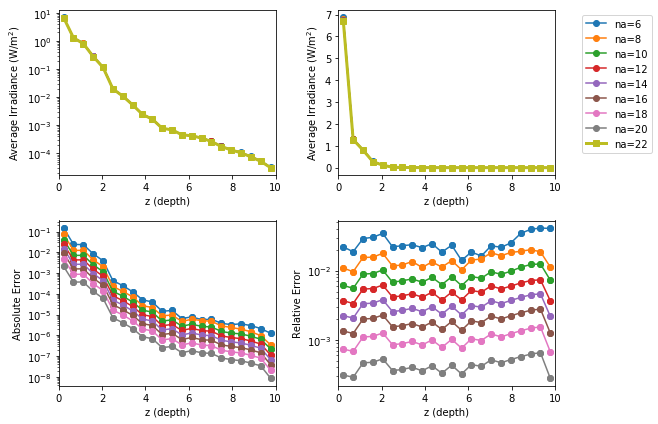

together


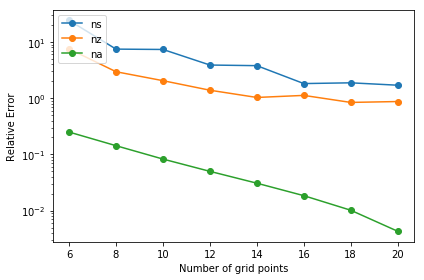

In [100]:
cori_grid_study_plot_three_edges('gs22all_high_scatter')

# Asymptotics Accuracy

In [ ]:
# Set parameters
aut8 = [0.144, 0.037]
hao11 = [0.179, 0.219]
nuc2200 = [0.337, 1.583]
nuc2240 = [0.125, 1.205]
petzold_iops = [aut8, hao11, nuc2200, nuc2240]
petzold_names = ['aut8', 'hao11', 'nuc2200', 'nuc2240']

ns = 22
na = 22
nz = 22
kelp_profile='top-heavy'
max_scatter = 16

asym_conv_true_pi = {}
asym_conv_gmres_time = {}

for name, (a_water, b) in zip(petzold_names, petzold_iops):
    # GMRES
    gmres_results = lv.apply(kelp_param.kelp_calculate,
        a_water,
        b,
        ns,
        na,
        nz,
        kelp_profile,
        absorptance_kelp=0.8,
        gmres_flag=True,
        num_scatters=0,
        const=const
    ).result()

    p_kelp = gmres_results['p_kelp']
    true_irrad = gmres_results['irradiance']
    true_rad = gmres_results['radiance']
    asym_conv_gmres_time[name] = gmres_results['duration']
    true_perceived_irrad = np.sum(p_kelp*true_irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))
    asym_conv_true_pi[name] = true_perceived_irrad

In [ ]:
save_dict = {}
res_dict = {}

scat_nums = range(0, max_scatter+1, 4)
# Run scattering cases
for name, (a_water, b) in zip(petzold_names, petzold_iops):
    res_list = []
    save_list = []
    true_perceived_irrad = asym_conv_true_pi[name]
    for n in scat_nums:
        print("n={}".format(n))
        #print("const={}".format(const))
        compute_results = lv.apply(kelp_param.kelp_calculate,
            a_water,
            b,
            ns,
            na,
            nz,
            kelp_profile,
            absorptance_kelp=0.8,
            gmres_flag=False,
            num_scatters=n,
            const=const
        ).result()

        irrad = compute_results['p_kelp']
        irrad = compute_results['irradiance']
        # Perceived irradiance for each depth layer
        perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))
        perc_abs_err = np.abs(true_perceived_irrad - perceived_irrad)
        perc_rel_err = np.abs((true_perceived_irrad - perceived_irrad)/true_perceived_irrad)

        save_vals = {
            'irrad': irrad.mean(axis=(0,1)),
            'perceived_irrad': perceived_irrad,
            'perc_abs_err': perc_abs_err,
            'perc_rel_err': perc_rel_err,
            'duration': compute_results['duration']
        }

        res_list.append(compute_results)
        save_list.append(save_vals)
    res_dict[name] = res_list
    save_dict[name] = save_list

### Plot Convergence Curves

In [ ]:
!mkdir data figures -p

In [ ]:
with open("data/asym_conv_save.dill", 'wb') as fh:
    dill.dump(save_dict, fh)

In [ ]:
with open("data/asym_conv_res.dill", 'wb') as fh:
    dill.dump(res_dict, fh)

In [ ]:
with open("data/asym_conv_gmres.dill", 'wb') as fh:
    dill.dump(gmres_results, fh)

In [ ]:
dz = (zmax-zmin)/nz
z = np.linspace(zmin+0.5*dz, zmax-0.5*dz, nz)
for name, iops in zip(petzold_names, petzold_iops):
    true_perceived_irrad = asym_conv_true_pi[name]
    plt.figure(figsize=[8,6])
    for i, scat in enumerate(res_dict[name]):
        plt.plot(z, save_dict[name][i]['perceived_irrad'], 'o-', label='n={}'.format(scat_nums[i]))
    
    plt.plot(z, np.abs(true_perceived_irrad), 's-', lw=3, label='FD')
    plt.title("{}: a_water={}, b={}".format(name, *iops))
    plt.xlabel('z (m)')
    plt.ylabel(r'Perceived Irradiance ($\mathrm{W/m}^2$)')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/asym_conv_irrad_{}.png'.format(name), dpi=300)
    
plt.show()

In [ ]:
dz = (zmax-zmin)/nz
z = np.linspace(zmin+0.5*dz, zmax-0.5*dz, nz)
for name, iops in zip(petzold_names, petzold_iops):
    true_perceived_irrad = asym_conv_true_pi[name]
    plt.figure(figsize=[8,6])
    for i, scat in enumerate(res_dict[name]):
        plt.plot(z, save_dict[name][i]['perc_rel_err'], 'o-', label='n={}'.format(scat_nums[i]))
    
    #plt.plot(z, np.abs(true_perceived_irrad), 'o-', label='FD')
    plt.title("{}: a_water={}, b={}".format(name, *iops))
    plt.xlabel('z (m)')
    plt.ylabel('Relative Error: Perceived Irradiance')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/asym_conv_rel_err_{}.png'.format(name), dpi=300)
    
plt.show()

In [ ]:
plt.figure(figsize=[8,6])
for name, iops in zip(petzold_names[:-2], petzold_iops[:-2]):
    abs_err = np.array([res['perc_abs_err'].mean() for res in save_dict[name]])
    rel_err = np.array([res['perc_rel_err'].mean() for res in save_dict[name]])
    plt.plot(scat_nums, rel_err, 'o-', label='{}: a={}, b={}'.format(name, *iops))
    
plt.xticks(scat_nums)
plt.xlabel('# of Scattering Events')
plt.ylabel('Relative Error (Perceived Irrad)')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('figures/asym_conv_compare.png')
plt.show()

In [ ]:
np.array([res['perc_rel_err'].mean() for res in save_dict['aut8']])

# Sensitivity Analysis

In [ ]:
def f(x, y):
    print("x={}, y={}")

In [ ]:
def vary_params(**user_params):
    """Supply lists of param values. Only specify ones you're interested in. 
    Will be varied from base case separately."""
    base_params = {
        'a_water': 0.179,
        'b': 0.219,
        'ns': 16,
        'na': 16,
        'nz': 16,
        'absorptance_kelp': 0.8,
        'kelp_profile': 'top-heavy',
        'gmres_flag': False,
        'num_scatters': 12,
        'const': const
    }
    
    results_dict = {}
    perceived_irrad_dict = {}
    
    # Combine, with user overrides, one at a time.
    for param, vals in user_params.items():
        for val in vals:
            new_params = {**base_params, **{param: val}}
            compute_results = lv.apply(kelp_param.kelp_calculate, **new_params).result()
            results_dict[(param, val)] = compute_results
    
            p_kelp = compute_results['p_kelp']
            irrad = compute_results['irradiance']
            perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))
            perceived_irrad_dict[(param, val)] = perceived_irrad
            
    
    return results_dict, perceived_irrad_dict

In [ ]:
def plot_params(user_dict, perceived_irrad_dict):
    for param, vals in user_dict.items():
        plt.figure()
        for val in vals:
            perceived_irrad = perceived_irrad_dict[(param, val)]
            nz = len(perceived_irrad)
            dz = (zmax-zmin)/nz
            z = np.linspace(zmin+0.5*dz, zmax-0.5*dz, nz)
            param_str = val
            if param == 'b':
                param_str = 'b/a={:.2f}'.format(val/a_water)
            elif isinstance(val, float):
                param_str = '{:.2f}'.format(val)
            plt.plot(z, perceived_irrad, 'o-', label='{}'.format(param_str))
        #plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))
        plt.legend()
        plt.xlabel('z (m)')
        plt.ylabel(r'Perceived Irradiance ($\mathrm{W/m}^2$)')
        plt.yscale('log')
        plt.savefig('figures/sens_analysis_{}.png'.format(param), dpi=300)
        plt.tight_layout()
        plt.show()

In [ ]:
user_dict = dict(
    kelp_profile=['top-heavy', 'uniform', 'bottom-heavy'],
    absorptance_kelp=np.linspace(0.6,1.0,5),
    b = a_water * np.linspace(0.5, 2.0, 5)
)
results_dict, perceived_irrad_dict = vary_params(**user_dict)

In [ ]:
plot_params(user_dict, perceived_irrad_dict)

In [ ]:
user_dict = dict(
    b = a_water * np.linspace(0.5, 2.0, 10)
)
results_dict, perceived_irrad_dict = vary_params(**user_dict)

In [ ]:
plot_params(user_dict, perceived_irrad_dict)

In [ ]:
user_dict = dict(
    a_water = np.linspace(0.05, 0.5, 10)
)
results_dict, perceived_irrad_dict = vary_params(**user_dict)

In [ ]:
plot_params(user_dict, perceived_irrad_dict)